In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [344]:
df=pd.read_csv(r'C:\Users\mayar\Desktop\Amit\Datasets\marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [345]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Data Cleaning

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

there's some missing values in Income column, Dt_Customer is object and it should be date,  There are 2 categorical features that we should encode

drop ID column bec no imp info

In [347]:
print(df['Z_CostContact'].unique())
print(df['Z_Revenue'].unique())

[3]
[11]


These 2 cols have 1 unique value so not imp

In [348]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

1- Change Dt_Customer into date

In [349]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates=[]
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


C:\Users\mayar\AppData\Local\Temp\ipykernel_38788\1294250883.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


use this date to count how many days is this person a customer

In [350]:
days=[]
d1=max(dates) #the newest customer
for i in dates:
    delta = d1 - i #subtracting each date from the newest date
    days.append(delta)
df['Customer_For'] = days #put the days in a new col called Customer_For
df['Customer_For'] = pd.to_numeric(df['Customer_For'])

In [351]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Age of Customer today

In [352]:
df['Age'] = 2014 -  df['Year_Birth']    #assuming that the dataset is not running

Total Spendings

In [353]:
df['Spent'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Divide customer by who lives alone and not

In [354]:
df['Living_With'] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

Total children in a household

In [355]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

Total members in a household

In [356]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

Parent or not

In [357]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0) 

Dividing education levels into 3 groups

In [358]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

For clarity

In [359]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#mmkn n3mlhom drop asln w el PCA hyshlhom 3shn ana kda kda hatahom fe column esmo Spent

Dropping redundant features

In [360]:
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [362]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,121.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

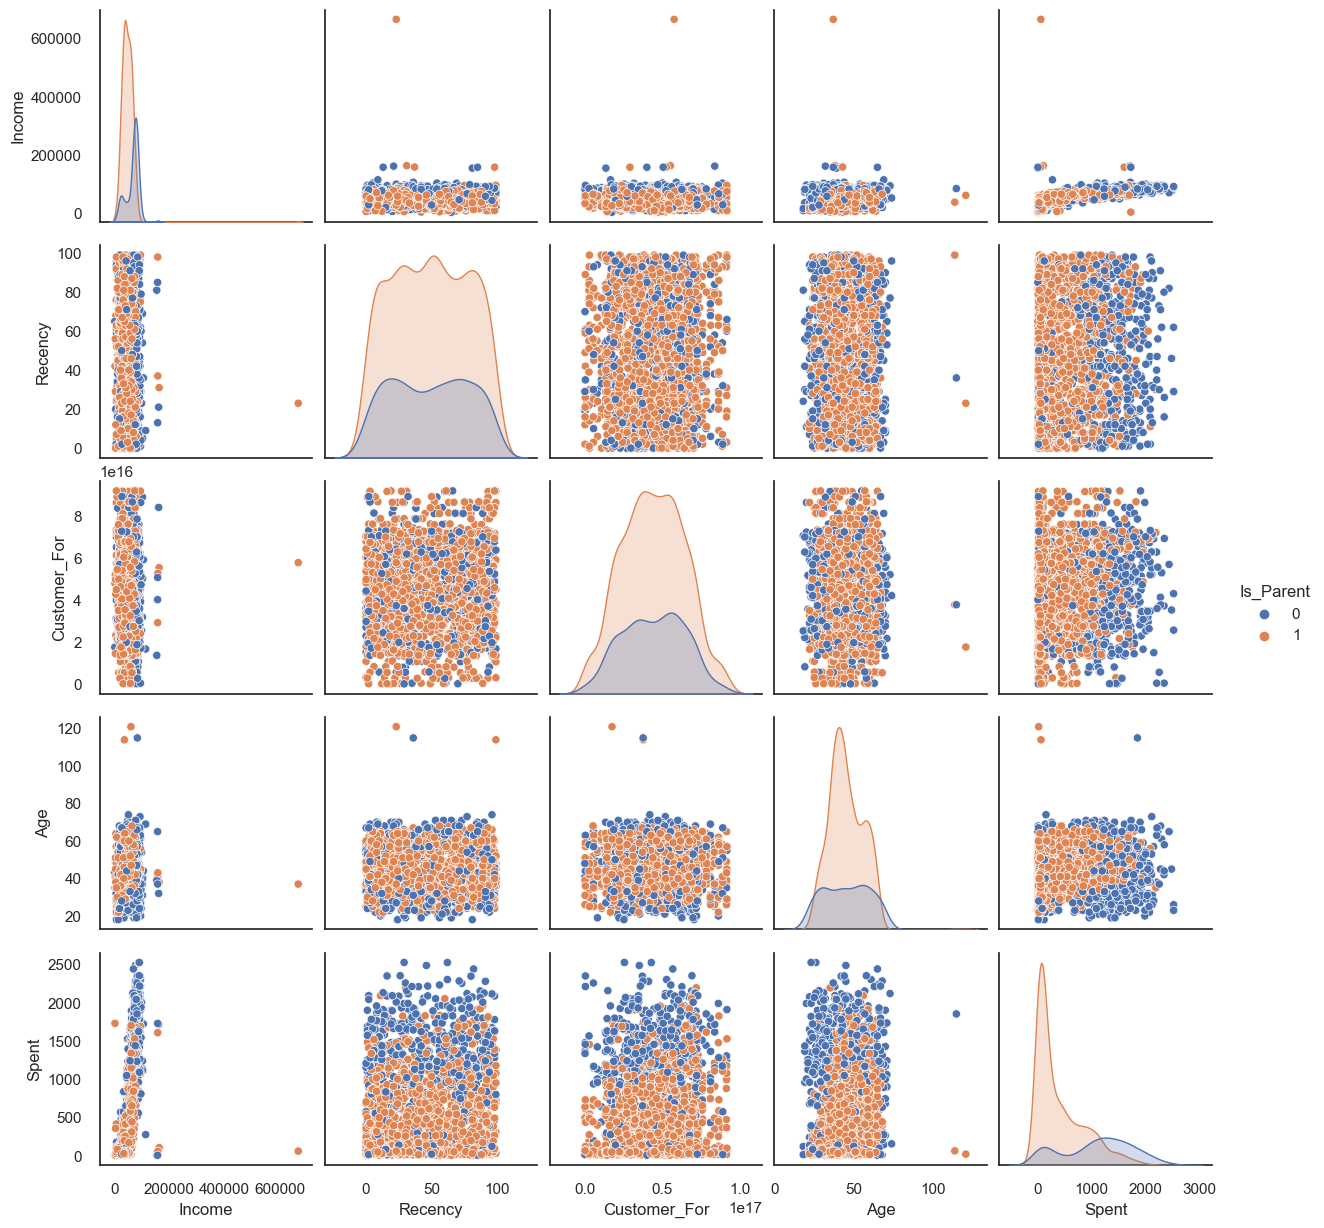

In [363]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent")

<AxesSubplot: xlabel='Age', ylabel='Income'>

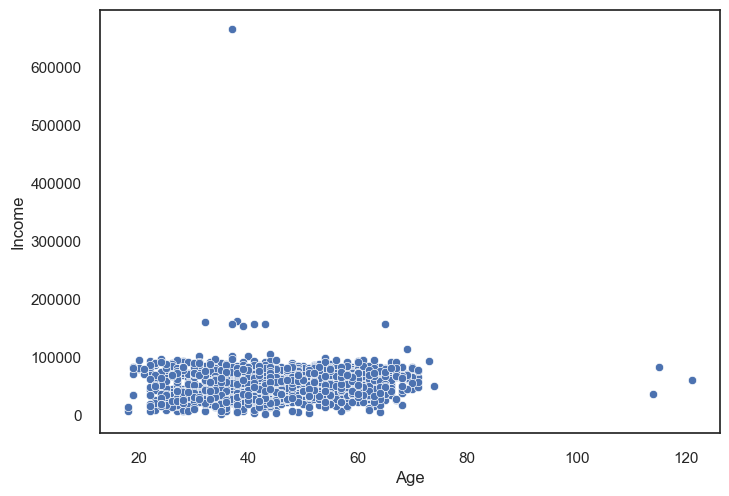

In [364]:
sns.scatterplot(data=df, y=df['Income'], x=df['Age'])

<AxesSubplot: >

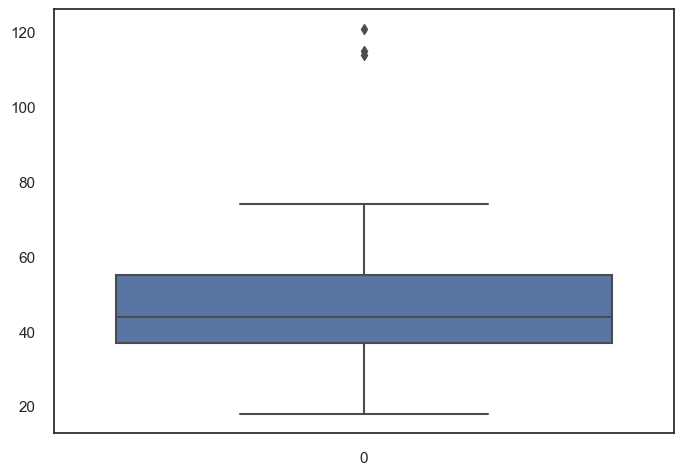

In [365]:
sns.boxplot(df['Age'])

there are few outilers in Income and Age columns

In [366]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<85)]
df = df[(df["Income"]<600000)]

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

C:\Users\mayar\AppData\Local\Temp\ipykernel_38788\3264325939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


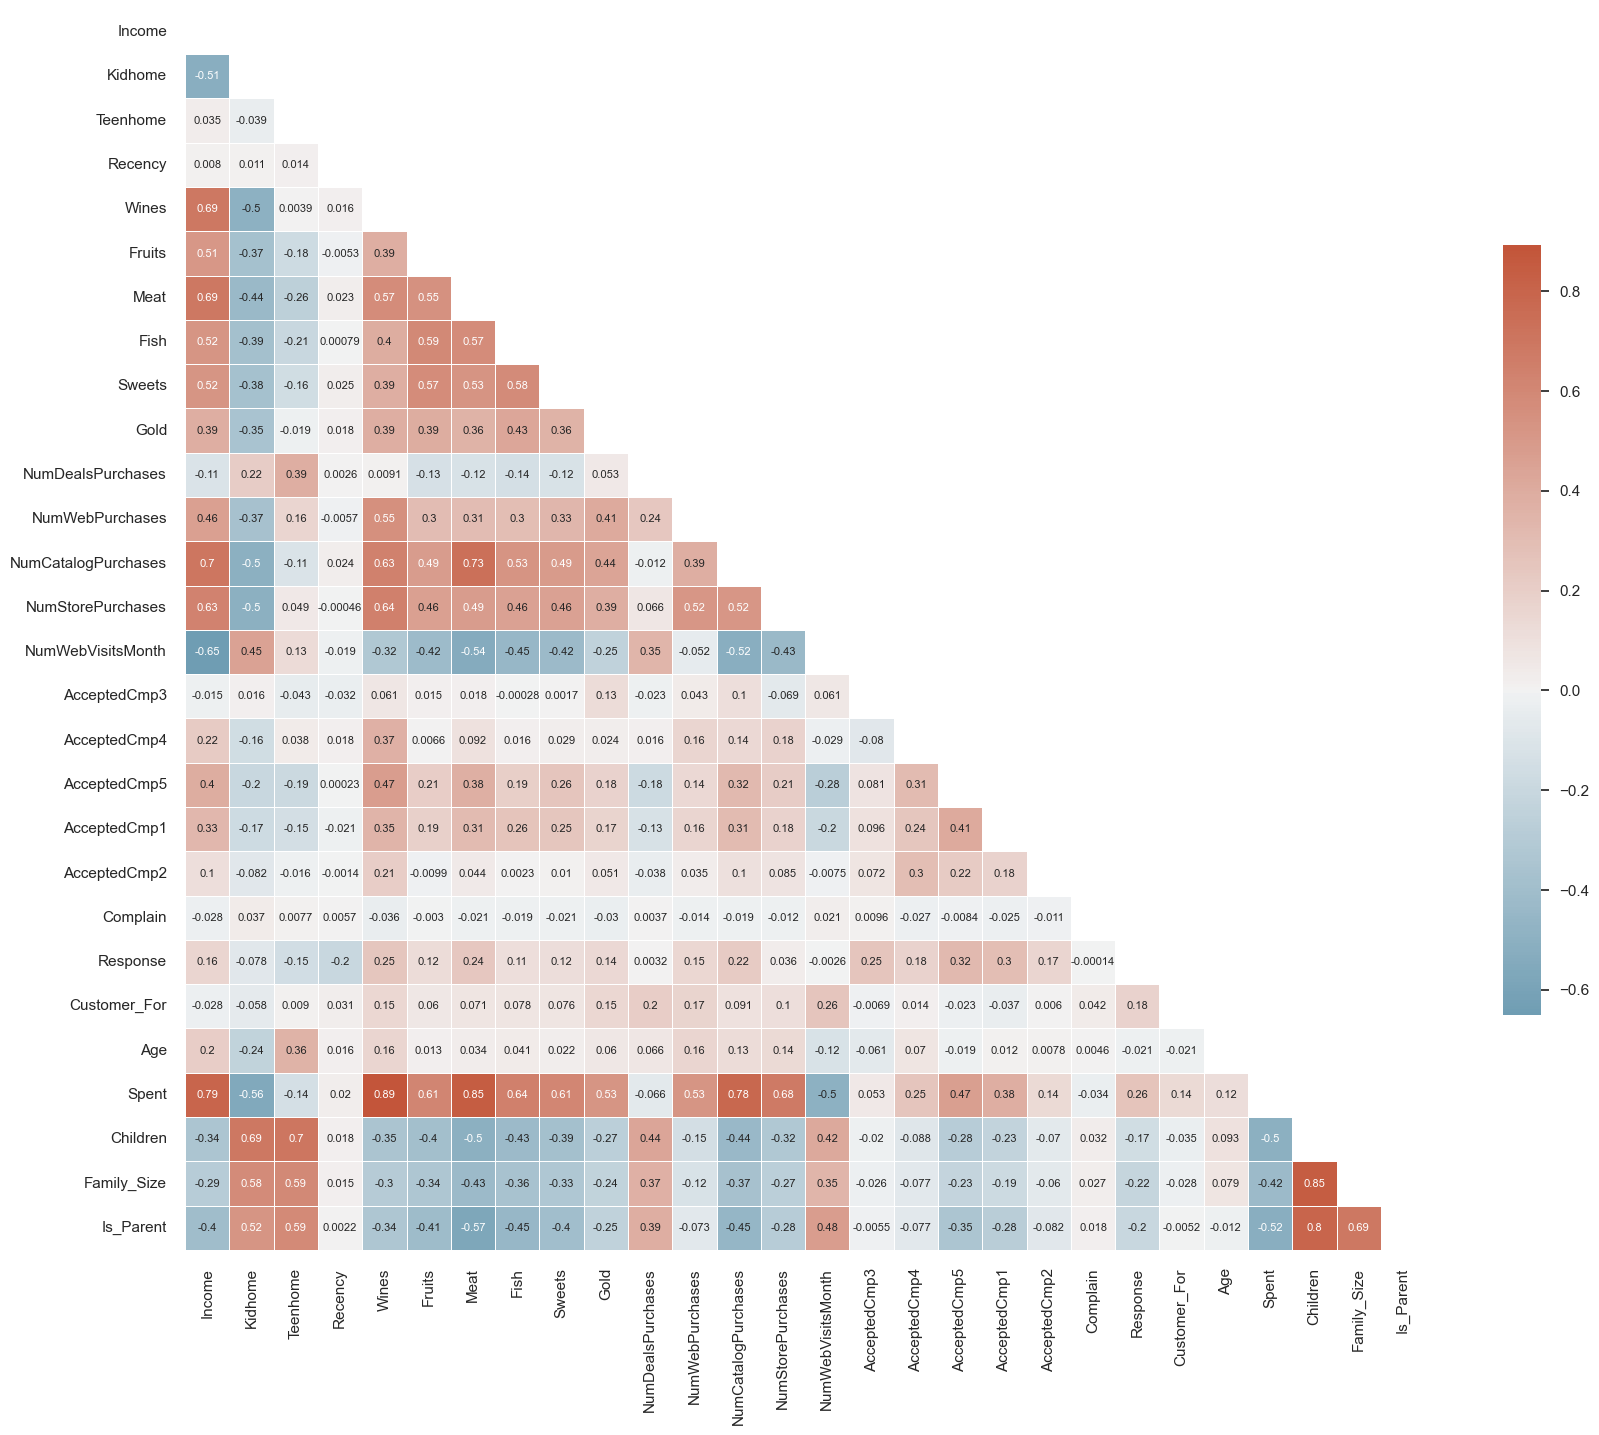

In [368]:
def showCorrelationOnData(data,*,threshold=None):
    sns.set_theme(style="white")
    corr = data.corr()
    if threshold:
        corr = data.corr()[(data.corr() >= threshold) | (data.corr() <= -threshold)]
    mask = np.triu(np.ones_like(corr, dtype=bool)) #returns upper triangle, ones_like htshof el hagat el rg3tle true zy b3d (fe benhom corr) w hatethom m3 b3d
    f, ax = plt.subplots(figsize=(20, 20))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, \
        cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})
    
    plt.show()

showCorrelationOnData(df)

## Data Preprocessing

encoding, scaling

In [369]:
#Get list of categorical variables
s = (df.dtypes == 'object')
# s[s] --->   is the categorical columns with True infront of it
# s[s].index   # --->  Index(['Education', 'Living_With'], dtype='object')
# list(s[s].index)  # ---> ['Education', 'Living_With']
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [370]:
#label encoding
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [371]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
#All features are now scaled

## Dimensionality Reduction

### PCA

In [372]:
pca = PCA(n_components=3) #I reduced dimensions to 3
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

In [373]:
PCA_ds.head()

,col1,col2,col3
0,4.994347,-0.151196,2.647984
1,-2.884455,-0.006681,-1.863942
2,2.617865,-0.720808,-0.252598
3,-2.676036,-1.541968,-0.922875
4,-0.649591,0.209849,-0.020738


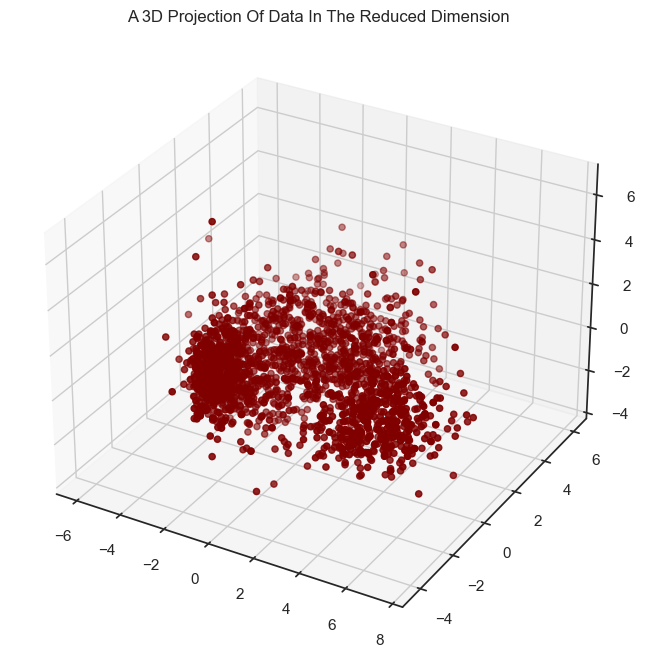

In [374]:
#the reduced dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

### Agglomerative Clustering vs KMeans vs DBSCAN

In [375]:
! pip install yellowbrick

Elbow Method to determine the number of clusters to be formed:


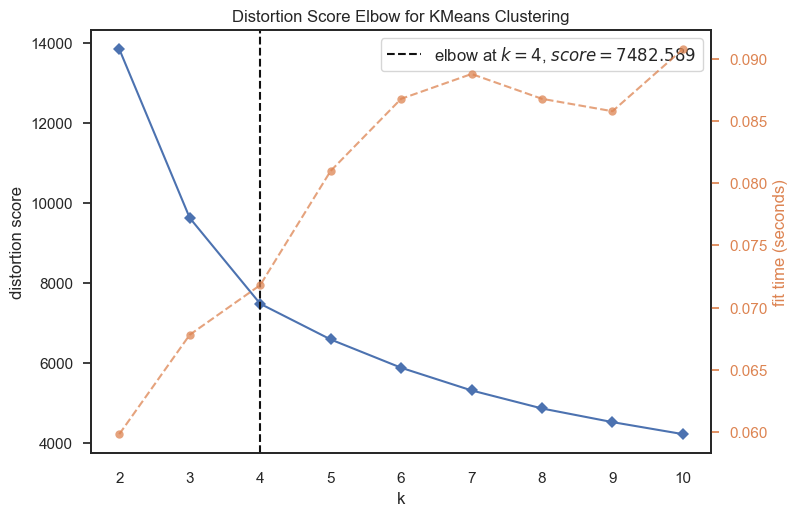

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [376]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [377]:
# KM = KMeans(n_clusters=4)
# kclusters = KM.fit_predict(PCA_ds)
# PCA_ds['kClusters'] = kclusters


# DB = DBSCAN(eps=.5, min_samples=10)
# dbclusters = DB.fit_predict(PCA_ds)
# PCA_ds['dbClusters'] = dbclusters


AC = AgglomerativeClustering(n_clusters=4)
clusters = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = clusters
df["Clusters"]= clusters

In [378]:
# print('Hierarchial Agglomerative')
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label='bla')
# ax.scatter(x, y, z, s=40, c=PCA_ds['Clusters'], marker='o', cmap='PuBu')
# ax.set_title("Plot of Clusters")
# plt.show()


# print('KMeans')
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label='bla')
# ax.scatter(x, y, z, s=40, c=PCA_ds['kClusters'], marker='o', cmap='PuBu')
# ax.set_title("Plot of Clusters")
# plt.show()


# print('DBSCAN')
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label='bla')
# ax.scatter(x, y, z, s=40, c=PCA_ds['dbClusters'], marker='o', cmap='PuBu')
# ax.set_title("Plot of Clusters")
# plt.show()

In [380]:
print('Silhouette Coeff (Hierarchial Agglomerative): %0.3f' % metrics.silhouette_score(PCA_ds, AC.labels_))
# print('Silhouette Coeff (KMeans): %0.3f' % metrics.silhouette_score(PCA_ds, km.labels_))
# print('Silhouette Coeff (DBSCAN): %0.3f' % metrics.silhouette_score(PCA_ds, db.labels_))

Silhouette Coeff (Hierarchial Agglomerative): 0.409


Hierarchial Agglomerative has the best score

### Visualising the relation between Spent and Income

<AxesSubplot: xlabel='Clusters', ylabel='count'>

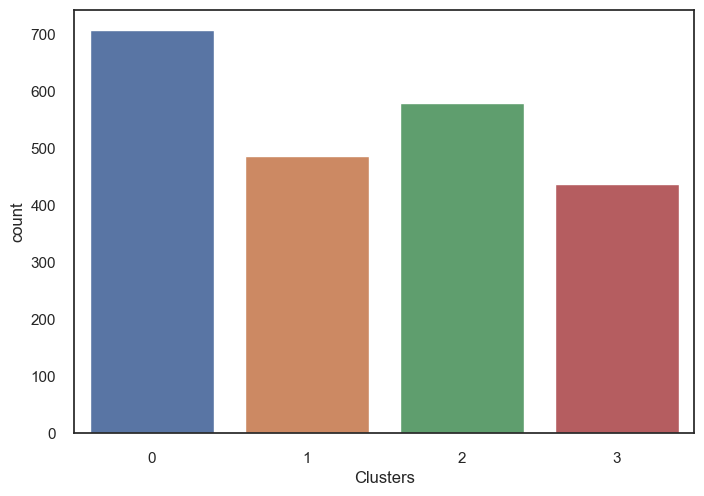

In [381]:
sns.countplot(x=df["Clusters"] )

<AxesSubplot: xlabel='Spent', ylabel='Income'>

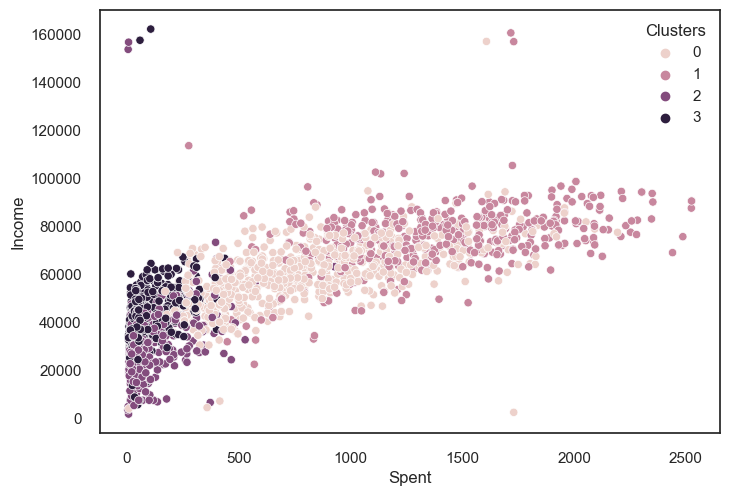

In [382]:
sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])

<AxesSubplot: xlabel='Clusters', ylabel='Spent'>

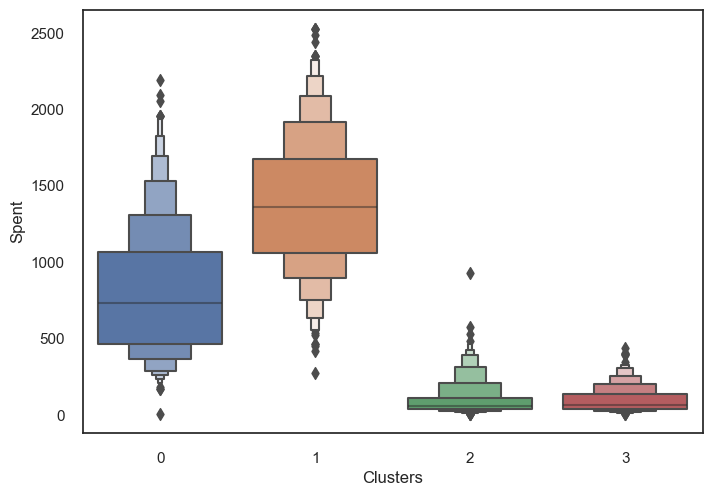

In [383]:
sns.boxenplot(x=df["Clusters"], y=df["Spent"])

<AxesSubplot: xlabel='Clusters', ylabel='Income'>

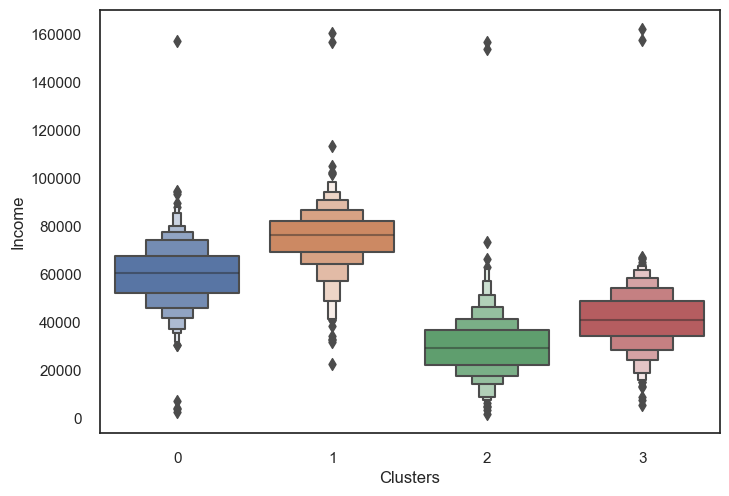

In [384]:
sns.boxenplot(x=df["Clusters"], y=df["Income"])

We can observe that most customers are in cluster 0, which is people of average income and high spending, followed by cluster 1 (high income and high spending)